
# Assignment 3: Code for data modelling presentation

Prepared by Aliia Gismatullina s4051304

## Table of contents 

1 - Preparation of raw data

    1.1 - Loading the libraries
    1.2 - Data retrieval
    1.3 - Data cleaning

2 - Exploratory data analysis

    2.1 - Balanced / imbalanced data
    2.2 - Count Vectorizor    
    2.3 - Common words for spam and ham
    
3 - Data Modelling (KNN Classifier)

    3.1 - Model training (SMOTE)    
    3.2 - Machine learning process    
    3.3 - Model evaluation 
    
4 - Data Modelling (Decision Tree Classifier)

    4.1 - Model training (SMOTE)    
    4.2 - Machine learning process    
    4.3 - Model evaluation     
    
5 - Results of the classifiers    

## 1 Preparation of raw data

### 1.1 Loading the libraries

In [1]:
import os

import io

import ast

import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.neighbors import KNeighborsClassifier 

from sklearn.tree import DecisionTreeClassifier 

from sklearn.model_selection import train_test_split 

from sklearn.model_selection import GridSearchCV 

from sklearn.metrics import accuracy_score,balanced_accuracy_score,confusion_matrix, ConfusionMatrixDisplay 

from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE 

import ssl

import nltk 

from nltk.corpus import stopwords 

from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt

import seaborn as sns

from time import time

### 1.2 Data retrieval

In [2]:
# Loading the dataset
file_path = 'A3_sms.csv'
sms_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure and contents
sms_data.head()

,Unnamed: 0,sms,spam,Unnamed: 3
0,0,1. Tension face 2. Smiling face 3. Waste face ...,False,NaN
1,1,Hhahhaahahah rofl was leonardo in your room or...,False,NaN
2,4,Oh for sake she's in like,False,NaN
3,5,No da:)he is stupid da..always sending like th...,False,NaN
4,6,Lul im gettin some juicy gossip at the hospita...,False,NaN


### 1.3 Data cleaning

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

# Converting everything to lower case
sms_data['sms_processed'] = sms_data['sms'].str.lower()

# Removing special characters, numbers, and stop words
sms_data['sms_processed'] = sms_data['sms_processed'].str.replace('[^\w\s]', '', regex=True)

# Tokenisation
sms_data['tokens'] = sms_data['sms_processed'].apply(word_tokenize)

# Removing stopwords
stop_words = set(stopwords.words('english'))
sms_data['tokens'] = sms_data['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Displaying the processed data
sms_data[['sms', 'sms_processed', 'tokens']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aliiagismatullina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aliiagismatullina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sms,sms_processed,tokens
0,1. Tension face 2. Smiling face 3. Waste face ...,1 tension face 2 smiling face 3 waste face 4 i...,"[1, tension, face, 2, smiling, face, 3, waste,..."
1,Hhahhaahahah rofl was leonardo in your room or...,hhahhaahahah rofl was leonardo in your room or...,"[hhahhaahahah, rofl, leonardo, room, something]"
2,Oh for sake she's in like,oh for sake shes in like,"[oh, sake, shes, like]"
3,No da:)he is stupid da..always sending like th...,no dahe is stupid daalways sending like thisdo...,"[dahe, stupid, daalways, sending, like, thisdo..."
4,Lul im gettin some juicy gossip at the hospita...,lul im gettin some juicy gossip at the hospita...,"[lul, im, gettin, juicy, gossip, hospital, oyea]"


## 2 Exploratory data analysis

### 2.1 Balanced / imbalanced data

In [4]:
# Checking for null values
null_check = sms_data.isnull().sum()

# Checking balance of the dataset
balance_check = sms_data['spam'].value_counts(normalize=True)

null_check, balance_check

(Unnamed: 0          0
 sms                 0
 spam                0
 Unnamed: 3       5302
 sms_processed       0
 tokens              0
 dtype: int64,
 False    0.868436
 True     0.131564
 Name: spam, dtype: float64)

### 2.2 Count Vectorizor

In [5]:
# Initializing CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# Fitting and transform the joined sms data
X = vectorizer.fit_transform(sms_data['sms_processed'])

# Converting the result to a DataFrame for easier analysis
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Next, let's move to identify the most common words for spam and ham SMS messages
# Sum word occurrences to identify the most common words
word_sums = word_counts.sum(axis=0).sort_values(ascending=False)

word_sums.head(10)

im      432
ur      378
just    339
ltgt    270
dont    268
ok      267
free    262
know    240
got     228
good    228
dtype: int64

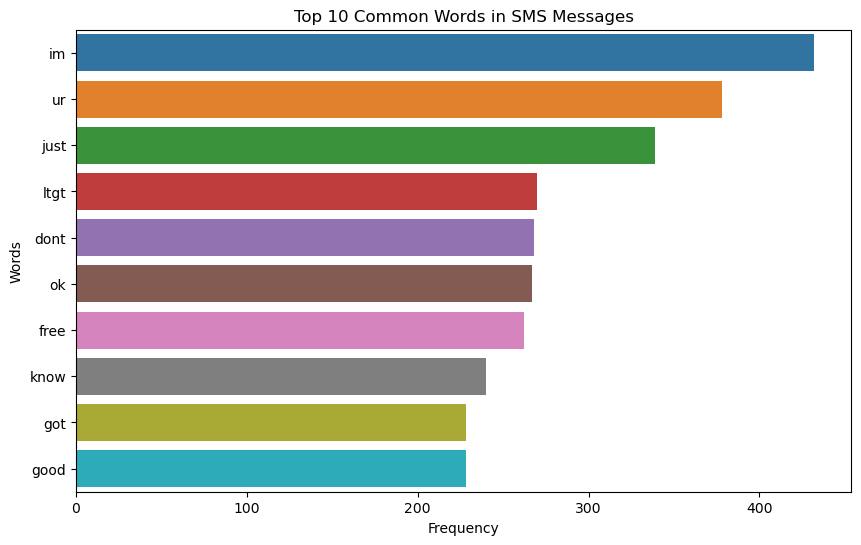

In [6]:
# Plotting the most common words overall
plt.figure(figsize=(10, 6))
sns.barplot(x=word_sums.values[:10], y=word_sums.index[:10])
plt.title('Top 10 Common Words in SMS Messages')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

### 2.3 Common words for spam and ham

In [7]:
# Separating the dataset into spam and ham
spam_messages = sms_data[sms_data['spam'] == True].index
ham_messages= sms_data[sms_data['spam'] == False].index

# Calculating word frequencies for spam messages
spam_word_counts = word_counts.iloc[spam_messages].sum(axis=0).sort_values(ascending=False)

# Calculating word frequencies for ham messages
ham_word_counts = word_counts.iloc[ham_messages].sum(axis=0).sort_values(ascending=False)

# Displaying the top 10 most common words in spam messages
top_spam_words = spam_word_counts.head(10)

# Displaying the top 10 most common words in ham messages
top_ham_words = ham_word_counts.head(10)

top_spam_words, top_ham_words

(free      206
 ur        141
 txt       139
 mobile    121
 claim     113
 text      100
 stop       98
 reply      94
 prize      92
 won        73
 dtype: int64,
 im      426
 just    271
 ltgt    270
 ok      263
 dont    252
 ur      237
 ill     227
 come    224
 got     223
 good    216
 dtype: int64)

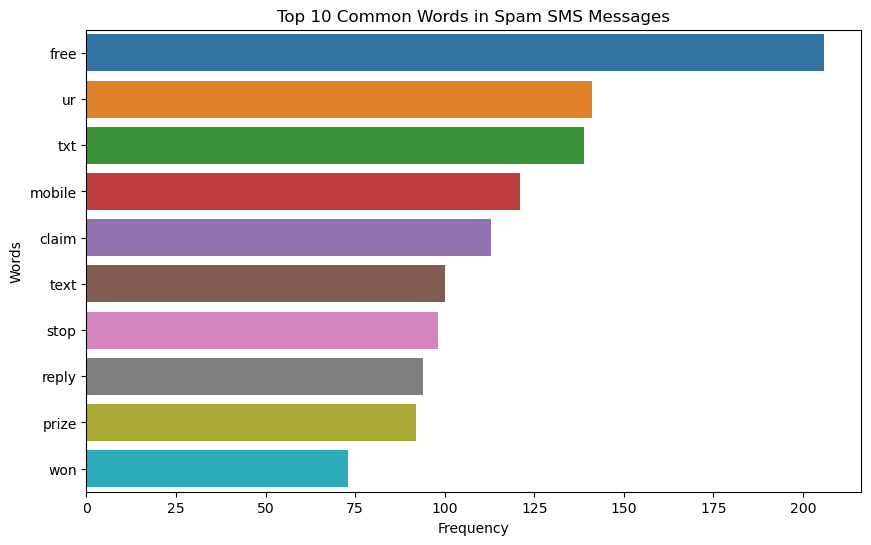

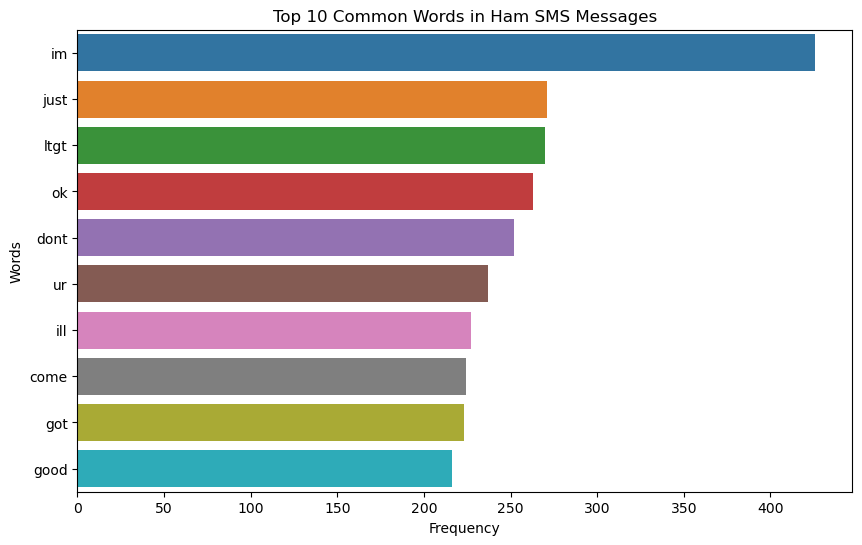

In [8]:
# Plotting the most common words in spam messages
plt.figure(figsize=(10, 6))
sns.barplot(x=top_spam_words.values[:10], y=top_spam_words.index[:10])
plt.title('Top 10 Common Words in Spam SMS Messages')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# Plotting the most common words in ham messages
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ham_words.values[:10], y=top_ham_words.index[:10])
plt.title('Top 10 Common Words in Ham SMS Messages')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

## 3 Data Modelling (KNN Classifier)

### Model Training

In [9]:
# Preparing features and target variable
X = sms_data['sms_processed']
y = sms_data['spam'].astype(int)  # To ensure that the target is numerical

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing the text data
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Applying SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_vect, y_train)

# Checking the balance after applying SMOTE
balance_after_smote = pd.Series(y_train_res).value_counts(normalize=True)

balance_after_smote

0    0.5
1    0.5
Name: spam, dtype: float64

#### KNN and Hyperparameter tuning

In [10]:
# Initializing KNN with a starting value for k, e.g., 5
knn = KNeighborsClassifier(n_neighbors=5)

# Training KNN on the resampled (balanced) training data
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier()

In [11]:
# Hyperparameter Tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_res, y_train_res)
best_knn = grid_search.best_estimator_

In [12]:
# Evaluating the best KNN model found by grid search on the test set
y_pred = best_knn.predict(X_test_vect)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       920
           1       0.83      0.79      0.81       151

    accuracy                           0.95      1071
   macro avg       0.90      0.88      0.89      1071
weighted avg       0.95      0.95      0.95      1071



#### KNN classifier evaluation and metrics

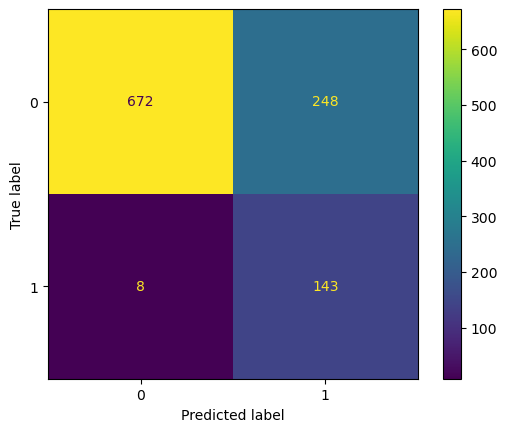

In [13]:
# Measuring training time
start_time = time()
knn.fit(X_train_res, y_train_res)  # Training on the resampled (balanced) training data
training_time = time() - start_time

# Predicting on the test set
start_time = time()
y_predicted = knn.predict(X_test_vect)
prediction_time = time() - start_time
prediction_time_per_message = prediction_time / len(y_test)

# Creating a DataFrame to store results
results = pd.DataFrame()

# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [14]:
# Accuracy
results.loc['knn', 'accuracy'] = accuracy_score(y_test, y_predicted)

# Balanced accuracy
results.loc['knn', 'balanced_accuracy'] = balanced_accuracy_score(y_test, y_predicted)

# Training time
results.loc['knn', 'training_time'] = training_time

# Prediction time per message
results.loc['knn', 'prediction_time'] = prediction_time_per_message

print(results)

     accuracy  balanced_accuracy  training_time  prediction_time
knn  0.760971           0.838727       0.002342          0.00023


#### Training and evaluation of KNN (SMOTE)

In [15]:
# Balancing the training set with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_vect, y_train)

# Confirming the balancing
print(f"Proportion of spam messages in the training set: {y_train_smote.mean()}")

Proportion of spam messages in the training set: 0.5


#### Training of KNN (SMOTE) using hyperparameter tuning

In [16]:
# Initializing KNN and set up hyperparameter space for tuning
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'p': [1, 2]
}

# Setting up GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Training KNN using the balanced dataset
grid_search.fit(X_train_smote, y_train_smote)

# Extracting best parameters
best_params = grid_search.best_estimator_.get_params()
print(f"Best p: {best_params['p']}")
print(f"Best n_neighbors: {best_params['n_neighbors']}")

Best p: 2
Best n_neighbors: 1


In [17]:
# Evaluating the best model found by GridSearchCV on the test set
y_predicted = grid_search.predict(X_test_vect) 
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       920
           1       0.88      0.86      0.87       151

    accuracy                           0.96      1071
   macro avg       0.93      0.92      0.92      1071
weighted avg       0.96      0.96      0.96      1071



#### KNN (SMOTE) classifier evaluation

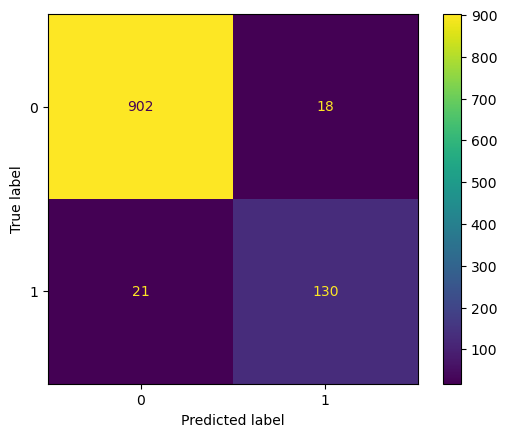

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted, labels=grid_search.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.classes_)
disp.plot()

In [19]:
# Updating results DataFrame with KNN (SMOTE) metrics
results.loc['knn_SMOTE', 'accuracy'] = accuracy_score(y_test, y_predicted)
results.loc['knn_SMOTE', 'balanced_accuracy'] = balanced_accuracy_score(y_test, y_predicted)

# Training and Prediction Time
results.loc['knn_SMOTE', 'training_time'] = grid_search.cv_results_['mean_fit_time'].mean()
results.loc['knn_SMOTE', 'prediction_time'] = grid_search.cv_results_['mean_score_time'].mean() / len(y_test)

# The updated metrics
print("Accuracy:", results.loc['knn_SMOTE', 'accuracy'])
print("Balanced accuracy:", results.loc['knn_SMOTE', 'balanced_accuracy'])
print("Training time (s):", results.loc['knn_SMOTE', 'training_time'])
print("Prediction time per message (s):", results.loc['knn_SMOTE', 'prediction_time'])

Accuracy: 0.9635854341736695
Balanced accuracy: 0.9206809674632882
Training time (s): 0.0024980831146240237
Prediction time per message (s): 0.0004072124105430339


## 4 Data Modelling (Decision Tree Classifier)

In [20]:
# Decision Tree classifier
dt = DecisionTreeClassifier()

# Hyperparameter Tuning

# Dictionary of hyperparameters
hyperparameters = {
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_depth': [2, 3, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

In [21]:
# Applying grid search with cross-validation
dt_grid_search = GridSearchCV(dt, hyperparameters, scoring='accuracy', cv=5)

dt_grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

#### Training and Evaluating (Without SMOTE)

In [22]:
# Training on the original (non-SMOTE) training set
dt_grid_search.fit(X_train_vect, y_train) 

# Best hyperparameters
print('Best max_depth:', dt_grid_search.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', dt_grid_search.best_estimator_.get_params()['min_samples_leaf'])
print('Best criterion:', dt_grid_search.best_estimator_.get_params()['criterion'])

Best max_depth: 20
Best min_samples_leaf: 5
Best criterion: gini


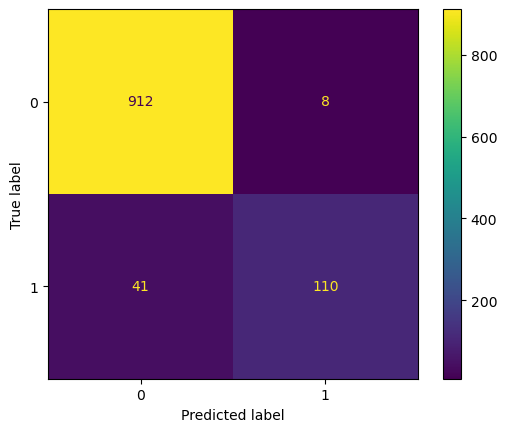

In [23]:
# Predicting on the test set
y_predicted_dt = dt_grid_search.predict(X_test_vect) 

# Evaluation metrics
cm_dt = confusion_matrix(y_test, y_predicted_dt, labels=dt_grid_search.best_estimator_.classes_)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_grid_search.best_estimator_.classes_)
disp_dt.plot()

In [24]:
# Storing results
results.loc['dt', 'accuracy'] = accuracy_score(y_test, y_predicted_dt)
results.loc['dt', 'balanced_accuracy'] = balanced_accuracy_score(y_test, y_predicted_dt)
results.loc['dt', 'training_time'] = dt_grid_search.cv_results_['mean_fit_time'].mean()
results.loc['dt', 'prediction_time'] = dt_grid_search.cv_results_['mean_score_time'].mean() / len(y_test)

print("Accuracy (DT):", results.loc['dt', 'accuracy'])
print("Balanced accuracy (DT):", results.loc['dt', 'balanced_accuracy'])
print("Training time (DT):", results.loc['dt', 'training_time'])
print("Prediction time per message (DT):", results.loc['dt', 'prediction_time'])

Accuracy (DT): 0.954248366013072
Balanced accuracy (DT): 0.85989058450907
Training time (DT): 0.007242819150288901
Prediction time per message (DT): 1.3104111392142579e-06


#### Training and Evaluation (using SMOTE)

In [25]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_vect, y_train)

# Re-training with the balanced dataset
dt_grid_search.fit(X_train_smote, y_train_smote)

# Best hyperparameters
print('Best max_depth (SMOTE):', dt_grid_search.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf (SMOTE):', dt_grid_search.best_estimator_.get_params()['min_samples_leaf'])
print('Best criterion (SMOTE):', dt_grid_search.best_estimator_.get_params()['criterion'])

Best max_depth (SMOTE): 20
Best min_samples_leaf (SMOTE): 5
Best criterion (SMOTE): gini


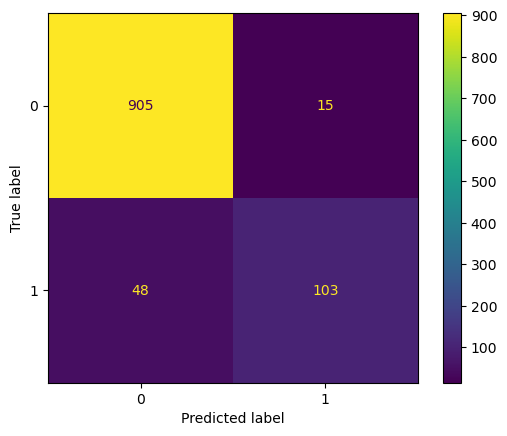

In [26]:
# Predicting on the test set
y_predicted_dt_smote = dt_grid_search.predict(X_test_vect)

# Evaluation metrics (SMOTE)
cm_dt_smote = confusion_matrix(y_test, y_predicted_dt_smote, labels=dt_grid_search.best_estimator_.classes_)
disp_dt_smote = ConfusionMatrixDisplay(confusion_matrix=cm_dt_smote, display_labels=dt_grid_search.best_estimator_.classes_)
disp_dt_smote.plot()

In [27]:
# Storing results (SMOTE)
results.loc['dt_SMOTE', 'accuracy'] = accuracy_score(y_test, y_predicted_dt_smote)
results.loc['dt_SMOTE', 'balanced_accuracy'] = balanced_accuracy_score(y_test, y_predicted_dt_smote)
results.loc['dt_SMOTE', 'training_time'] = dt_grid_search.cv_results_['mean_fit_time'].mean()
results.loc['dt_SMOTE', 'prediction_time'] = dt_grid_search.cv_results_['mean_score_time'].mean() / len(y_test)

print("Accuracy (DT with SMOTE):", results.loc['dt_SMOTE', 'accuracy'])
print("Balanced accuracy (DT with SMOTE):", results.loc['dt_SMOTE', 'balanced_accuracy'])
print("Training time (DT with SMOTE):", results.loc['dt_SMOTE', 'training_time'])
print("Prediction time per message (DT with SMOTE):", results.loc['dt_SMOTE', 'prediction_time'])

Accuracy (DT with SMOTE): 0.9411764705882353
Balanced accuracy (DT with SMOTE): 0.8329074287359632
Training time (DT with SMOTE): 0.011976265907287597
Prediction time per message (DT with SMOTE): 1.5094945855946547e-06


## 5 Results of the classifiers

In [28]:
results

,accuracy,balanced_accuracy,training_time,prediction_time
knn,0.760971,0.838727,0.002342,0.000230
knn_SMOTE,0.963585,0.920681,0.002498,0.000407
dt,0.954248,0.859891,0.007243,0.000001
dt_SMOTE,0.941176,0.832907,0.011976,0.000002


#### Accuracy and balanced accuracy

<Axes: >

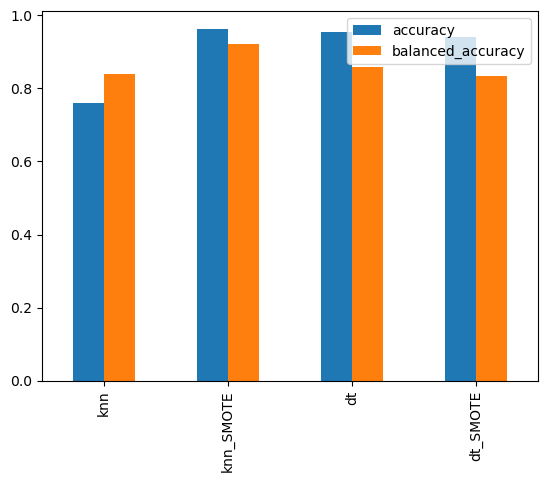

In [29]:
results[['accuracy','balanced_accuracy']].plot(kind="bar")

#### Training time (in seconds)

<Axes: >

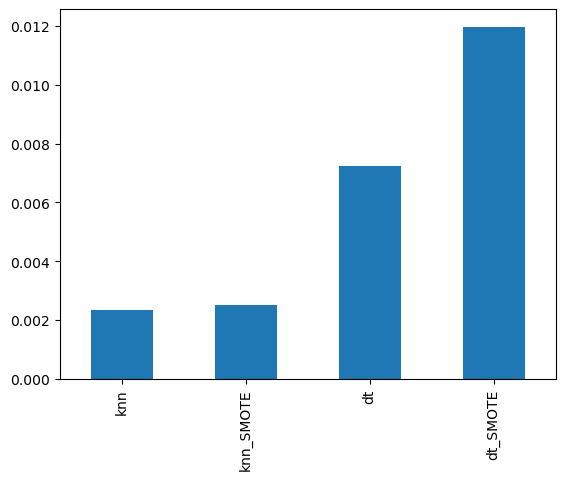

In [30]:
results['training_time'].plot(kind="bar") 

#### Prediction time (in seconds) per message

<Axes: >

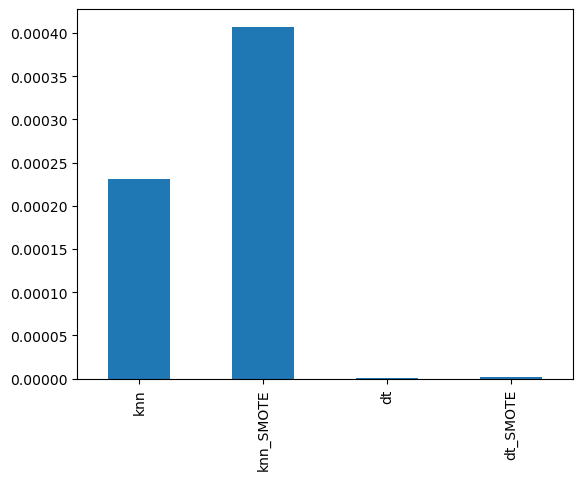

In [31]:
results['prediction_time'].plot(kind="bar")